<h1>Text Input</h1>

Contribution: Felix Kalley, Lena Manschewski

<p>As part of an exercise in a university course about interaction techniques and technologies, we tried to optimize the ability to point and click with a computer mouse. Therefore we developed a new pointing method. The goal of this experiment is to detect, whether our technique is advantageous in comparison to the standard cursor behaviour. </p>

<h2>Genesis of our Novel pointing technique</h2>
<p>Our initial idea was to broaden the area a mouse can click with some kind of a cross (#) shaped cursor. Like a rook in chess can take another piece on the same row or line, our cursor should be able to click a target on the same x (and /)or y-axis. Two horizontal and two vertical lines should define the new clickable area. This approach soon turned out to be problematic, as we need to make sure, only the intended target really got clicked. Our cross cursor should have stretched above all of the screen, so often situations occured, where you could not select a single target, especially with many clickable targets on screen. </p>

<p>To solve this problem, we came up with two conditions:
"1) If there are no unwanted targets in the same axis (x or y), you can click the intended target as long as your cursor is on the same axis.
2) If there are other targets distracting, you have to select your target with the inner square (defined by the two horizontal and vertical lines #).
This approach worked, but turned out to be way too complex to be of any use. Even with extensive periods of training, we seemed to be much slower than with the default cursor. During these tests though, we noticed that we often missclicked a target only by a few pixels with the default cursor, especially when we tried to be fast. Therefore our cross cursor idea was scrapped, but the inner square - mentioned in condition 2 - was kept, though transformed into a circle to even out the distance in every direction. Born was our circle cursor. The idea is still the same, instead of clicking a simple point or pixel, you can now click a broader area, in our case everything covered under a circle of around 20 px.</p>

<p>Circle shaped cursors are often used for presenting, to highlight were a presenter is pointing to with his cursor. In contrast to our technique these highlighting cursors are only graphical overlays without extending the range of a click. The main difference between fitts' law pointing technique (default) and our novel technique (special) is that a user doesn't have to aim as precise, so this pointing technique may be faster than the default technique</p>

<p> To test our cursor we formulated the following initial pair of hypotheses:</p>

<h2>Hypothesis</h2>
<p><b>H0</b>: There is <b>no</b> difference between the default and the special pointing technique</p>
<p><b>H1</b>: There is <b>a</b> difference between the default and the special pointing technique</p>

<p>As variables we chose time between successful target clicks, as well as error rate, number of missclicks before the correct target is clicked. Therefore the following pairs of hypotheses are tested in our analysis:</p>

<p><b>H0</b>: There is <b>no</b> difference between the default and the special pointing technique considering time</p>
<p><b>H1</b>: There is <b>a</b> difference between the default and the special pointing technique considering time</p>

<p><b>H0</b>: There is <b>no</b> difference between the default and the special pointing technique considering error rate</p>
<p><b>H1</b>: There is <b>a</b> difference between the default and the special pointing technique considering error rate</p>

<h2>Experiment description</h2>
<p> At first we developed a  python program which presents several targets on screen. Users had to click marked targets in 40 repetitions, divided in four rounds with 10 targets to click each. As targets we chose colored circles, one of them was colored in a lighter shade than the others. The user was informed that he had to click the lighter shaded circle, the others simply were meant as distraction.</p>

<p>Each round uses another base color for the circles, whereas the order of these colors is counter-balanced and defined via the input file. A round is started with a press on the spacebar. Circles have to be clicked with the left mouse button. For each click, the program presents five circles to the subject which differ in size and distance from each other.</p>

<p>Four subjects (2 female, 2 male), ranging in age from 22 to 30 years, were tested for this experiment. All subjects were media informatics students. To conduct our experiment we used a Macbook Pro 13 inch (late 2013) and a wireless Logitech M705 mouse. All subjects were tested in a quiet private room.</p>

<h2>Interferences</h2>

<p>While the colors were not a meaningful part of our experiment, we had to make sure, differing colors don't influence the the experiment in a significant way. To exclude any effects we formulated our hypotheses also for colors:</p>

<p><b>H0</b>: There is <b>no</b> difference between circle colors considering time</p>
<p><b>H1</b>: There is a difference between circle colors considering time</p>

<p><b>H0</b>: There is <b>no</b> difference between circle colors considering error rate</p>
<p><b>H1</b>: There is <b>a</b> difference between circle colors considering error rate</p>

<h2>Variables</h2>
<p> Part of our hypotheses are the following variables:</p>
<p><b>Independent:</b> cursor type (or color)</p>
<p><b>Dependent:</b> time and error rate</p>

<h2> Experiment procedure </h2>
<p>Four subjects (2 female, 2 male), ranging in age from 22 to 30 years, were tested for this experiment. All subjects were media informatics students. To conduct our experiment we used a Macbook Pro 13 inch (late 2013) and a wireless Logitech M705 mouse. All subjects were tested in a quiet private room. At the beginning subjects were given instructions and were able to ask questions. Then the python programm was started with the default cursor setting. After completing the test, the program was started with our own cursor method and the test was conducted a second time.</p>

<p> All data we collected during the experiments are prepared and evaluated in the following section. </p>

<h2>Data Import</h2>

This section contains code handling the import of experiment data.

In [104]:
import csv
# array for all data
overall_data= []
# opens a file called 'data.csv'
with open('data.csv', newline='') as csvfile:
    # reads content of file delimited by comma and saves as data
    data = csv.reader(csvfile, delimiter=',')
    # saves every row from data in overall_data
    # this is done because it seems the file instantly closes after use in this cell
    # therefore the data variable seems to become useless
    for row in data:
        overall_data.append(row)

<h2>Preparation of data</h2>

Now the data will be prepared for further processing.
Eight clusters of data will be build, containing char, word, sentence typed and test end each for default and novel technique.

In [105]:
# overall data is divived into two arrays containing default and novel techniques times
# index of column with technique type data
technique_column_num = 0
# index of column with input type data
input_column_num = 1
# index of column with time data
time_column_num = 4
# cannot use row as index position, therefore a counter is needed...
row_counter = 0

times_default_chars = []
times_default_words = []
times_default_sentences = []
times_default_finished = []
times_novel_chars = []
times_novel_words = []
times_novel_sentences = []
times_novel_finished = []

# checks if the word special or novel is in the row and adds the row to the correspondent array
# iterates over rows
for row in overall_data:
    # checks for keyword default
    if overall_data[row_counter][technique_column_num] == 'default':
        # adds times as float to default list
        if overall_data[row_counter][input_column_num] == 'key pressed':
            times_default_chars.append(float(overall_data[row_counter][time_column_num]))
        elif overall_data[row_counter][input_column_num] == 'word typed':
            times_default_words.append(float(overall_data[row_counter][time_column_num]))
        elif overall_data[row_counter][input_column_num] == 'sentence typed':
            times_default_sentences.append(float(overall_data[row_counter][time_column_num]))
        elif overall_data[row_counter][input_column_num] == 'test finished':
            times_default_finished.append(float(overall_data[row_counter][time_column_num]))
    # checks for keyword novel
    elif overall_data[row_counter][technique_column_num] == 'novel':
        # adds times as float to novel list
        if overall_data[row_counter][input_column_num] == 'key pressed':
            times_novel_chars.append(float(overall_data[row_counter][time_column_num]))
        elif overall_data[row_counter][input_column_num] == 'word typed':
            times_novel_words.append(float(overall_data[row_counter][time_column_num]))
        elif overall_data[row_counter][input_column_num] == 'sentence typed':
            times_novel_sentences.append(float(overall_data[row_counter][time_column_num]))
        elif overall_data[row_counter][input_column_num] == 'test finished':
            times_novel_finished.append(float(overall_data[row_counter][time_column_num]))
    else:
        # skips them
        pass
    row_counter+=1

<h2>Evaluation of "key pressed" data</h2>

In the following sections "key pressed" data will be evaluated.

<u>Mean, median and standard deviation:</u>

In [106]:
mean(times_default_chars)

0.27498527828746178

In [107]:
median(times_default_chars)

0.20321

In [108]:
std(times_default_chars)

0.26939903701157419

In [109]:
mean(times_novel_chars)

1.205395684210526

In [110]:
median(times_novel_chars)

1.1230260000000001

In [111]:
std(times_novel_chars)

0.36682355060500366

<h3>Scatter plots and bar plots</h3>

This section shows scatter plots for key pressed data with default and novel technique with time as x-axis and number of presses as y-axis.

In [112]:
# imports for plots
%matplotlib inline
from pylab import *

In [113]:
# sets the size of all following plots
rcParams["figure.figsize"] = (13, 8)

<u>Times with default technique:</u>

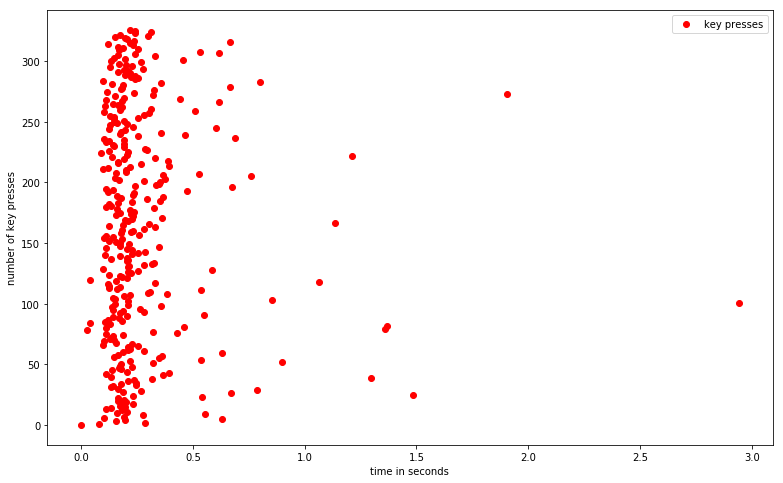

In [114]:
# sets the range for the axis values
IDdefChar = range (len(times_default_chars))
# draws the scatter plot
defChar = scatter(times_default_chars, IDdefChar, color='red')
legend([defChar], ['key presses'], loc='upper right')
xlabel('time in seconds')
ylabel('number of key presses')
show()

<u>Times with novel technique:</u>

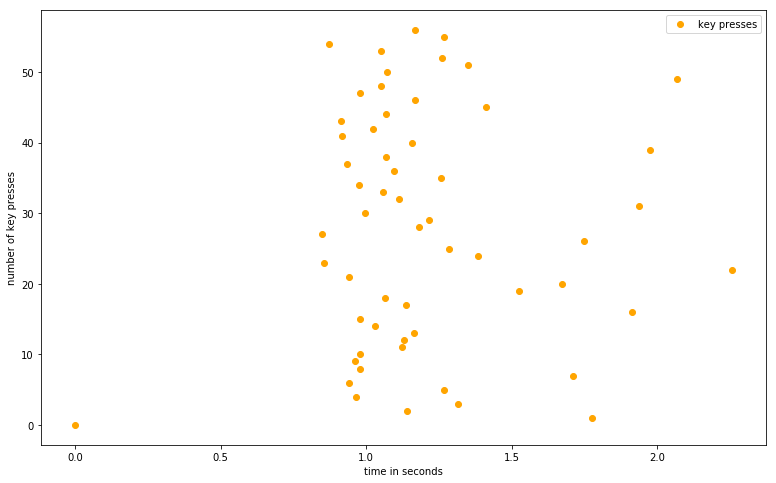

In [115]:
# sets the range for the axis values
IDnovChar = range (len(times_novel_chars))
# draws the scatter plot
novChar = scatter(times_novel_chars, IDnovChar, color='orange')
legend([novChar], ['key presses'], loc='upper right')
xlabel('time in seconds')
ylabel('number of key presses')
show()

<h3>Boxplots for key pressed data </h3>

This section shows the boxplots for key pressed data samples with times as y-axis.

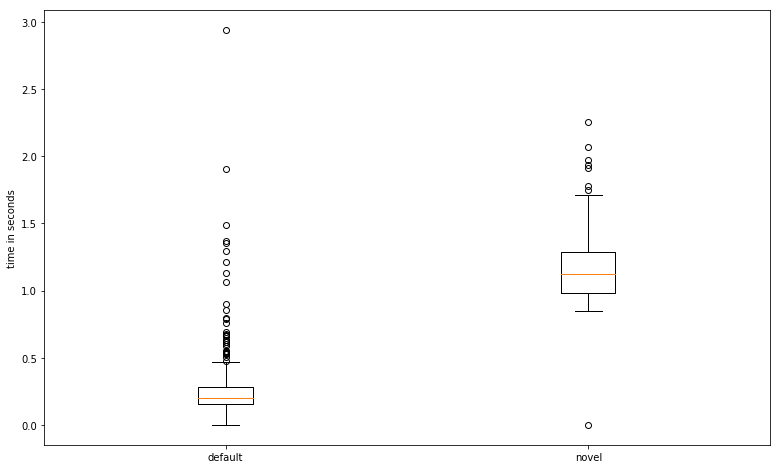

In [116]:
# draws the boxplots
boxplot([times_default_chars, times_novel_chars]);
xticks(range(1,3), ['default', 'novel'])
ylabel('time in seconds')
show()

<h3>t-Tests for key pressed data </h3>

Now t-tests are calculated for the key pressed data. The difference between default and novel technique is tested considering time and chars typed.

In [117]:
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

In [118]:
# t-test for difference in default and novel technique considering chars typed
t_statistic, p_value = ttest_ind(times_default_chars, times_novel_chars)
print("p-value: %2.3f" %(p_value))
# below 0.05 is statistically significant

p-value: 0.000


<h3>Calculate CPM</h3>

In [119]:
(len(times_default_chars) / sum(times_default_chars)) * 60

218.19349884351885

In [120]:
(len(times_default_chars) / sum(times_novel_chars)) * 60

285.55812072716202

<h3>Key pressed data resumee</h3>

TODO

<h2>Evaluation of words typed data</h2>

<u>Mean, median and standard deviation:</u>

In [121]:
mean(times_default_words)

1.4346361129032259

In [122]:
median(times_default_words)

1.1909015000000001

In [123]:
std(times_default_words)

0.72623880067802871

In [124]:
mean(times_novel_words)

8.1755817499999992

In [125]:
median(times_novel_words)

8.2166785000000004

In [126]:
std(times_novel_words)

2.1091136261486572

<h3>Scatter plots and bar plots for word typed data</h3>

Now scatter plots for both techniques are created, to show time data.

<u>Times for default technique data:</u>

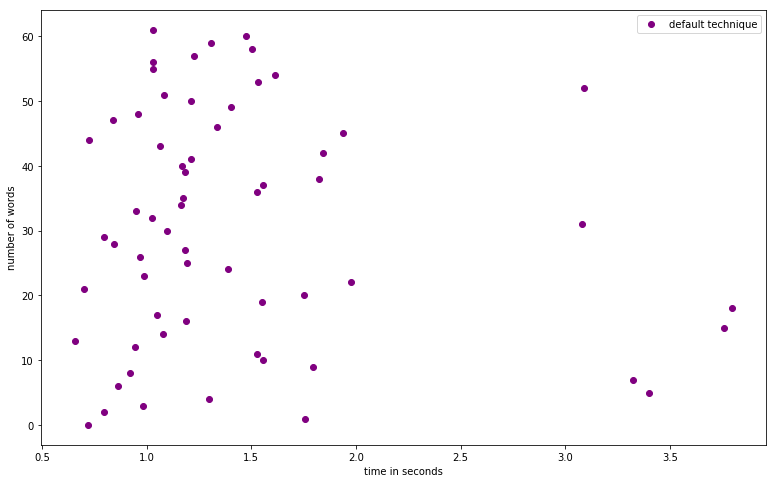

In [127]:
# sets the range for the axis values
IDdefWord = range (len(times_default_words))
# draws scatter plot
defWord = scatter(times_default_words, IDdefWord, color='purple')
legend([defWord], ['default technique'], loc='upper right')
xlabel('time in seconds')
ylabel('number of words')
show()

<u>Times for novel technique data:</u>

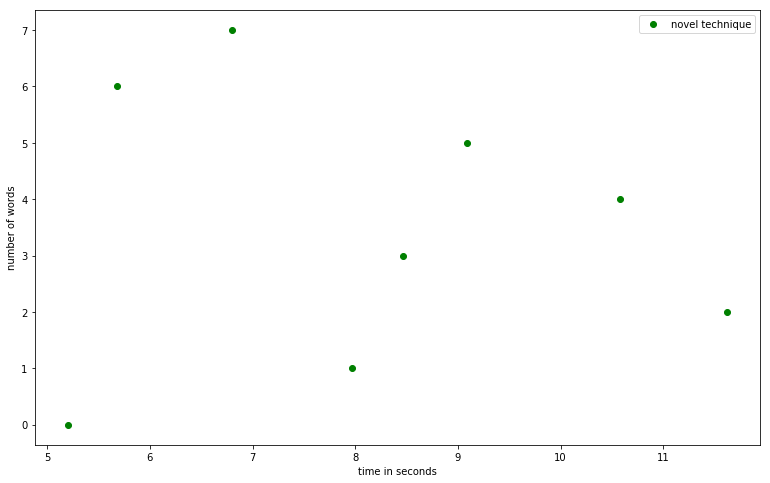

In [128]:
# sets the range for the axis values
IDnovWord = range (len(times_novel_words))
# draws scatter plot
novWord = scatter(times_novel_words, IDnovWord, color='green')
legend([novWord], ['novel technique'], loc='upper right')
xlabel('time in seconds')
ylabel('number of words')
show()

<h3>Box plots</h3>

This section shows the boxplot for novel and default technique data samples.

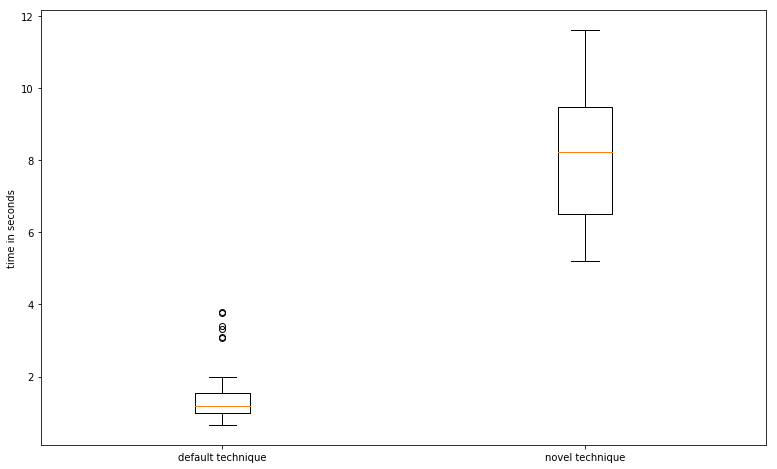

In [129]:
# draws the boxplots
boxplot([times_default_words, times_novel_words]);
xticks(range(1,3), ['default technique', 'novel technique'])
ylabel('time in seconds')
show()

<h3>T-tests</h3>

Now two t-tests are performed to evaluate our hypotheses. The difference between default and novel technique is tested considering time and words typed.

In [130]:
# t-test for difference default and novel technique regarding time
t_statistic, p_value = ttest_ind(times_default_words, times_novel_words)
print("p-value: %2.3f" %(p_value))
# below 0.05 is statistically significant

p-value: 0.000


<h3>Calculate WPM</h3>

In [131]:
(len(times_default_words) / sum(times_default_words)) * 60

41.822452021356114

In [132]:
(len(times_default_words) / sum(times_novel_words)) * 60

56.876686481668422

<h3>Words typed data resumee</h3>

TODO

<h2>Evaluation of sentence typed data</h2>

<u>Mean, median and standard deviation:</u>

In [133]:
mean(times_default_sentences)

12.897265428571428

In [134]:
median(times_default_sentences)

12.858556

In [135]:
std(times_default_sentences)

1.5572629430612137

In [136]:
mean(times_novel_sentences)

9.9524324285714272

In [137]:
median(times_novel_sentences)

9.9461680000000001

In [138]:
std(times_novel_sentences)

1.2845502200887124

<h3>Scatter plots for sentence typed data</h3>

Now scatter plots for both techniques are created, to show reaction time data.

<u>Times for default technique data:</u>

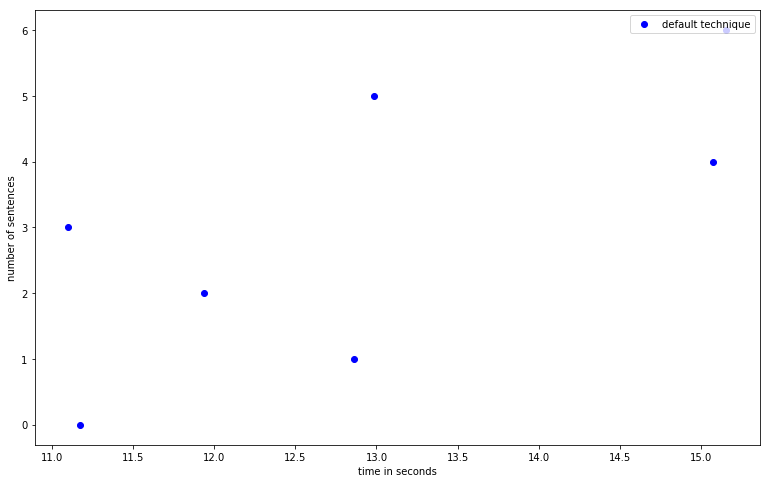

In [139]:
# sets the range for the axis values
IDdefSen= range (len(times_default_sentences))
# draws scatter plot
defSen = scatter(times_default_sentences, IDdefSen, color='blue')
legend([defSen], ['default technique'], loc='upper right')
xlabel('time in seconds')
ylabel('number of sentences')
show()

<u>Times for novel technique data:</u>

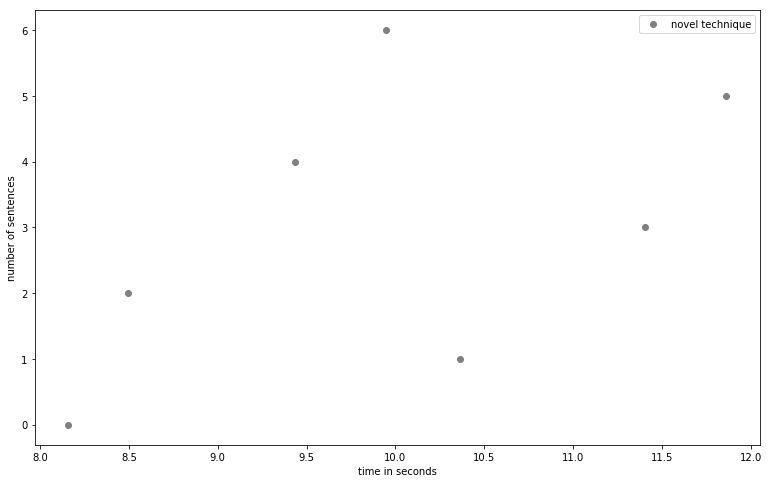

In [140]:
# sets the range for the axis values
IDnovSen = range (len(times_novel_sentences))
# draws scatter plot
novSen = scatter(times_novel_sentences, IDnovSen, color='gray')
legend([novSen], ['novel technique'], loc='upper right')
xlabel('time in seconds')
ylabel('number of sentences')
show()

<h3>Box plots</h3>

This section shows the boxplot for novel and default technique data samples.

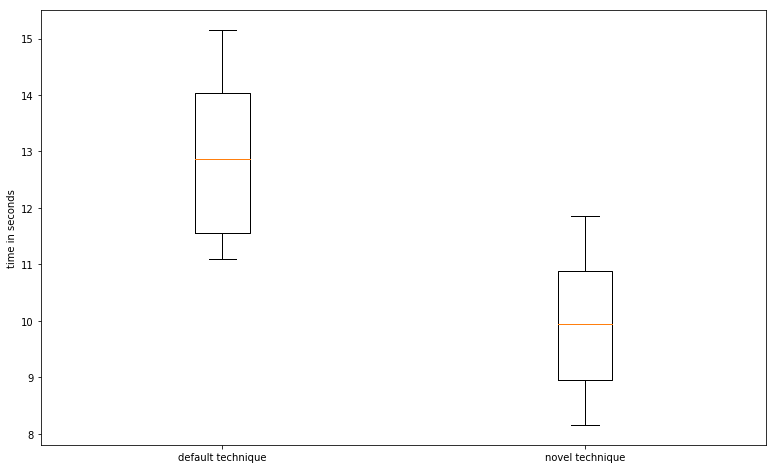

In [141]:
# draws the boxplots
boxplot([times_default_sentences, times_novel_sentences]);
xticks(range(1,3), ['default technique', 'novel technique'])
ylabel('time in seconds')
show()

<h3>T-tests</h3>

Now two t-tests are performed to evaluate our hypotheses. The difference between default and novel technique is tested considering time and sentences typed.

In [142]:
# t-test for difference default and novel technique regarding time
t_statistic, p_value = ttest_ind(times_default_sentences, times_novel_sentences)
print("p-value: %2.3f" %(p_value))
# below 0.05 is statistically significant

p-value: 0.004


<h3>Sentence typed data resumee</h3>

TODO

<h2>Evaluation of test finished data</h2>

<u>Mean, median and standard deviation:</u>

In [143]:
mean(times_default_finished)

90.293135000000007

In [144]:
median(times_default_finished)

90.293135000000007

In [145]:
std(times_default_finished)

0.0

In [146]:
mean(times_novel_finished)

69.667919999999995

In [147]:
median(times_novel_finished)

69.667919999999995

In [148]:
std(times_novel_finished)

0.0

<h3>Scatter plots for test finished data</h3>

Now scatter plots for both techniques are created, to show time data.

<u>Times for default technique data:</u>

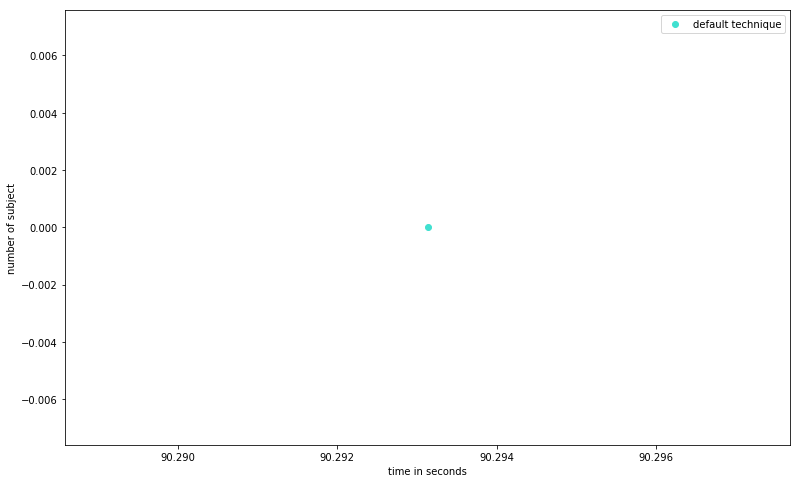

In [149]:
# sets the range for the axis values
IDdefFin = range (len(times_default_finished))
# draws scatter plot
defFin = scatter(times_default_finished, IDdefFin, color='turquoise')
legend([defFin], ['default technique'], loc='upper right')
xlabel('time in seconds')
ylabel('number of subject')
show()

<u>Times for novel technique data:</u>

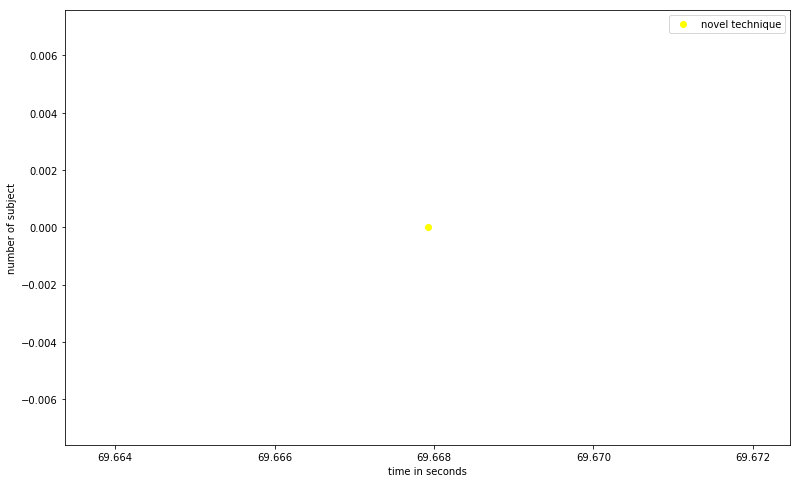

In [150]:
# sets the range for the axis values
IDnovFin = range (len(times_novel_finished))
# draws scatter plot
novFin = scatter(times_novel_finished, IDnovFin, color='yellow')
legend([novFin], ['novel technique'], loc='upper right')
xlabel('time in seconds')
ylabel('number of subject')
show()

<h3>Box plots</h3>

This section shows the boxplot for novel and default technique data samples.

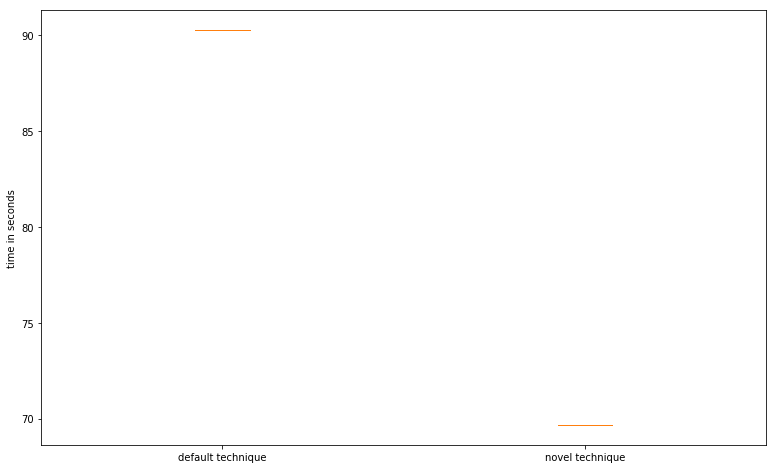

In [151]:
# draws the boxplots
boxplot([times_default_finished, times_novel_finished]);
xticks(range(1,3), ['default technique', 'novel technique'])
ylabel('time in seconds')
show()

<h3>T-tests</h3>

Now two t-tests are performed to evaluate our hypotheses. The difference between default and novel technique is tested considering time and test finished.

In [152]:
# t-test for difference default and novel technique regarding time
t_statistic, p_value = ttest_ind(times_default_finished, times_novel_finished)
print("p-value: %2.3f" %(p_value))
# below 0.05 is statistically significant

p-value: nan


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<h3>Test finished data resumee</h3>

TODO

<h2>Brief discussion of results</h2>

TODO